In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download mrwellsdavid/unsw-nb15
!unzip unsw-nb15.zip

 97% 145M/149M [00:01<00:00, 151MB/s]
100% 149M/149M [00:01<00:00, 130MB/s]
Archive:  unsw-nb15.zip
  inflating: NUSW-NB15_features.csv  
  inflating: UNSW-NB15_1.csv         
  inflating: UNSW-NB15_2.csv         
  inflating: UNSW-NB15_3.csv         
  inflating: UNSW-NB15_4.csv         
  inflating: UNSW-NB15_LIST_EVENTS.csv  
  inflating: UNSW_NB15_testing-set.csv  
  inflating: UNSW_NB15_training-set.csv  


In [ ]:
dataset = pd.read_csv('/content/UNSW_NB15_testing-set.csv')
dataset.head(10)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
5,6,0.380537,tcp,-,FIN,10,6,534,268,39.417980,...,1,40,0,0,0,2,39,0,Normal,0
6,7,0.637109,tcp,-,FIN,10,8,534,354,26.683033,...,1,40,0,0,0,1,39,0,Normal,0
7,8,0.521584,tcp,-,FIN,10,8,534,354,32.593026,...,1,40,0,0,0,3,39,0,Normal,0
8,9,0.542905,tcp,-,FIN,10,8,534,354,31.313031,...,1,40,0,0,0,3,39,0,Normal,0
9,10,0.258687,tcp,-,FIN,10,6,534,268,57.985135,...,1,40,0,0,0,3,39,0,Normal,0


In [ ]:
import random
import operator
import math
import numpy

import pandas as pd
import sklearn.metrics
import sklearn.model_selection
import sklearn.linear_model
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [ ]:
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
dataset["attack_cat"]=lb.fit_transform(dataset["attack_cat"])
dataset["proto"]=lb.fit_transform(dataset["proto"])
dataset["service"]=lb.fit_transform(dataset["service"])
dataset["state"]=lb.fit_transform(dataset["state"])

In [ ]:
X = dataset.iloc[:, 0:43].values
y = dataset.iloc[:, 43].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)


KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

#elavuating the results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   69    20   131   179     0     0    17     1     0     0]
 [   16    16   120   155    17     1     2    22     1     0]
 [   43    34   776  1413    60     5    10    58     8     0]
 [   69    55  1396  4600   271    11    74   251     9     1]
 [    6     5   145   344  2382     6   515   154    10     0]
 [    2     2    43    71    26  7867     0    10     2     0]
 [   20     2    21   129   691     0 10352    30     1     0]
 [    3     8   206   434   265     0    48  1107     4     0]
 [    0     2     6    14    87     1     7    65    41     0]
 [    0     0     1    15     4     0     0     3     0     1]]
              precision    recall  f1-score   support

           0       0.30      0.17      0.21       417
           1       0.11      0.05      0.06       350
           2       0.27      0.32      0.30      2407
           3       0.63      0.68      0.65      6737
           4       0.63      0.67      0.65      3567
           5       1.00      0.98      0.99 

In [ ]:
error = []

# Calculating error for K values between 1 and 40
for i in range(5, 20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

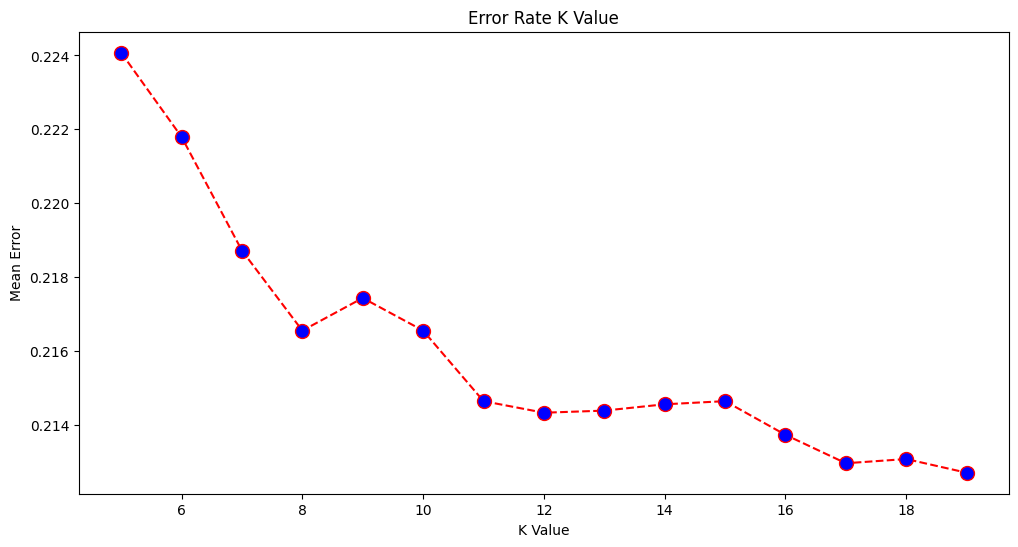

In [ ]:
#ploting
plt.figure(figsize=(12, 6))
plt.plot(range(5, 20), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')